In [328]:
import networkx as nx 
import random
import time
import queue
import math

#### Question 1:

In [388]:
def BFS(G,s):
    ''' Takes a networkx Graph (G) and a node index s, 
    returns the parents and distances of all nodes in 
    G with regards to their shorter path form s'''
    
    #check input
    try:
        G.nodes()
    except: 
        "Please check that G is a networkx Graph"
    if not isinstance(s,int):
        print("Please check that s is an index")
        return
        
    if s> G.number_of_nodes():
        print("It looks like your index is out of bounds, please check")
        return
    
    #BFS algorithm
    #set all nodes to white, infiite distance and no parent
    for v in G.nodes:
        G.nodes[v]["color"]="white"
        G.nodes[v]["distance"]=float('inf')
        G.nodes[v]["parent"]=None        
    #set s:
    G.nodes[s]["color"]="white"
    G.nodes[s]["distance"]=0
    G.nodes[s]["parent"]=None 
    
    #queue
    Q = queue.Queue() 
    Q.put(s)
    
    #walk
    while not Q.empty():
        u = Q.get()
        for w in G.neighbors(u):
            if G.nodes[w]["color"] == "white":
                G.nodes[w]["color"] = "grey"
                G.nodes[w]["distance"] = G.nodes[u]["distance"]+1
                G.nodes[w]["parent"]= str(u)
                Q.put(w)
            G.nodes[u]["color"]="black"
    
    #output
    #print ("Colors: ", G.nodes(data="color"))
    return (G.nodes(data="distance"), G.nodes(data="parent"))

        

#### Test Q1:

In [389]:
#make a random graph to test
nodes = 8
G=nx.Graph() 
for i in range(0,nodes):
    G.add_node(i)
    G.add_edge(random.randint(0,nodes),random.randint(0,nodes),weight=1)
    #G.add_edge(random.randint(0,nodes),random.randint(0,nodes),weight=1)
print(G.nodes)

[0, 3, 1, 2, 6, 7, 4, 8, 5]


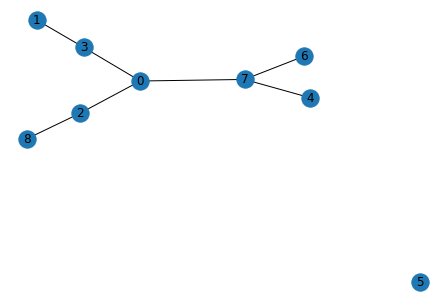

In [390]:
nx.draw(G, with_labels=True) #Visualize graph to compare results

In [391]:
BFS(G,3)

(NodeDataView({0: 1, 3: 0, 1: 1, 2: 2, 6: 3, 7: 2, 4: 3, 8: 3, 5: inf}, data='distance'),
 NodeDataView({0: '3', 3: None, 1: '3', 2: '0', 6: '7', 7: '0', 4: '7', 8: '2', 5: None}, data='parent'))

#### Question 2:

In [392]:
def NumberOfComponents(G):
    #check input
    try:
        G.nodes()
    except: 
        "Please check that G is a networkx Graph"
        
    if nx.is_directed(G) == True:
        print("This function is intended for non-directed graphs.")
        return
    
    
    #function
    c = G.number_of_nodes()+1
    d = 0
    for n in G.nodes:
        BFS(G,n)
        d = 0
        for m in G.nodes:
            if G.nodes[m]["parent"]== None:
                d = d + (1/(G.number_of_nodes()))
        d = d//1
        c = c - d      
    return c-d
            

In [405]:
NumberOfComponents(G)

8.0

#### Question 3:

In [470]:
def RandomGraph(N,p):
    '''Returns a graph with N nodes,
    where there is a uniform probability p
    of having an edge between two nodes'''
    if (isinstance(N,int) == False or N<0):
        print ("please check that your first argument is a non-negative integer")
    if (p<0 or p >1):
        print ("please check that your second argument is a probability (number between 0 and 1)")
    
    G=nx.Graph() 
    
    for i in range(0,N):
        G.add_node(i)
        for j in range(0,N):
            pS=random.uniform(0,1)
            if pS <= p:
                G.add_edge(i,j)
            
    return G

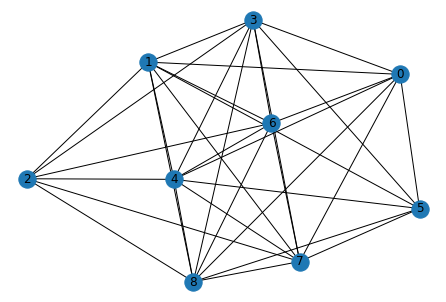

In [472]:
G=RandomGraph(9,0.6)
nx.draw(G, with_labels=True)

#### Question 4:

Bellman-Ford (G,s,x=None):
    '''Bellman-Ford approach. Finding 
    shortest path between vertex s and all
    other vertices v in graph G. If x (a vertex)
    is specified, then ir also specified the shortest
    path s to x. If it's not specified, it returns 
    all parents and distances from s. '''
    
    # initialize 
    d(s) = 0
    d(v) = ∞ for all other v
    parent(s) = None
    parent(v) = None  for all other v

    #get parents
    Repeat |V| - 1 times:
        For all edges (u,v):
            If d(u) + w(u,v) < d(v):
            d(v) = d(u) + w(u,v)
            parent(v) = u 
    
    #output
    if x is node in G.nodes:
        def PrintPath(G,s,x):
            list = [] 
            
            if parent(x) == None and x != s: 
               print "there's no path from s to x"
            else:
               list.append(parent(x))
               PrintPath(parent(x))
            return list 
        
         if x == s:
               print "x and s are the same node"
         else:
             return PrintPath(G,s,x), d(v), parent(v) for all v      
         
         
    else:
        return d(v), parent(v) for all v   
,
